<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-предобработка-данных" data-toc-modified-id="Обзор-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Звонки" data-toc-modified-id="Звонки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Звонки</a></span></li><li><span><a href="#Сообщения" data-toc-modified-id="Сообщения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Сообщения</a></span></li><li><span><a href="#Интернет" data-toc-modified-id="Интернет-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Интернет</a></span></li><li><span><a href="#Тарифы" data-toc-modified-id="Тарифы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Тарифы</a></span></li><li><span><a href="#Пользователи" data-toc-modified-id="Пользователи-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Пользователи</a></span></li></ul></li><li><span><a href="#Добавление-данных" data-toc-modified-id="Добавление-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Добавление данных</a></span></li><li><span><a href="#Анализ-тарифов" data-toc-modified-id="Анализ-тарифов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ тарифов</a></span><ul class="toc-item"><li><span><a href="#Звонки" data-toc-modified-id="Звонки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Звонки</a></span></li><li><span><a href="#Сообщения" data-toc-modified-id="Сообщения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сообщения</a></span></li><li><span><a href="#Интернет" data-toc-modified-id="Интернет-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Интернет</a></span></li><li><span><a href="#Выручка" data-toc-modified-id="Выручка-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выручка</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза 2</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Сравнительный анализ тарифных планов оператора

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. **Цель -  проанализировать поведение клиентов и сделать вывод — какой тариф лучше.**

## Обзор и предобработка данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st

In [2]:
calls = pd.read_csv('C:\\Users\maria\Desktop\ЯПрактикум\Проекты\Проект4\\calls.csv')
messages = pd.read_csv('C:\\Users\maria\Desktop\ЯПрактикум\Проекты\Проект4\\messages.csv')
internet = pd.read_csv('C:\\Users\maria\Desktop\ЯПрактикум\Проекты\Проект4\\internet.csv', index_col=0)
tariffs = pd.read_csv('C:\\Users\maria\Desktop\ЯПрактикум\Проекты\Проект4\\tariffs.csv')
users = pd.read_csv('C:\\Users\maria\Desktop\ЯПрактикум\Проекты\Проект4\\users.csv')

Изучим данные каждой таблицы по отдельности.

### Звонки

In [3]:
display(calls.head())
calls.info()
calls.duplicated().sum()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


0

Нет пропущенных значений, нет дубликатов. Необходимо перевести дату в формат `datetime` и изучить столбец `duration`.

In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info() # проверка формата даты

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64


<AxesSubplot:>

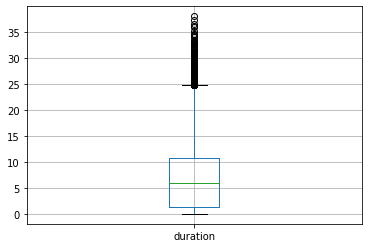

In [5]:
print(calls['duration'].describe()) # изучение данных столбца 'duration'
calls.boxplot('duration')

Данные в продолжительности звонков, однородны, больших выбросов нет, максимальное значение 38 минут, что вполне реально. Также в условии сказано, что значение 0 - это пропущенный вызов, поэтому его удалять не стоит. Но если звонок не состоялся, минуты не потрачены, то по моему мнению, эти данные не несут никакого смысла и никак не влияют на дальнейшее исследование. Поэтому уберём значения, где продолжительность звонков 0.

In [6]:
calls = calls.query('duration != 0')

### Сообщения

In [7]:
display(messages.head())
messages.info()
messages.duplicated().sum()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


0

Нет пропущенных значений, нет дубликатов. Необходимо перевести дату в формат `datetime`.

In [8]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Интернет

In [9]:
display(internet.head())
internet.info()
internet.duplicated().sum()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


0

Нет пропущенных значений, нет дубликатов. Есть столбец `Unnamed: 0`, который возникает, когда данные сохраняют с указанием индекса. Чтобы данные отображались корректно при чтении файла в начале работы укажем этот столбец как `pd.read_csv(..., index_col=0)`. 

Также необходимо перевести дату в формат `datetime` и изучить столбец `mb_used`.

In [10]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') # перевод даты

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64


<AxesSubplot:>

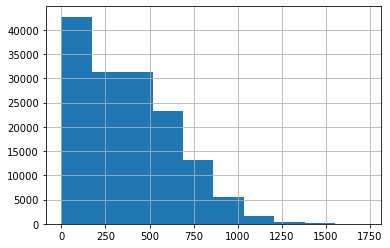

In [11]:
# изучение данных столбца 'mb_used'
print(internet['mb_used'].describe())
internet['mb_used'].hist()

Видно, что в данных есть значения 0 Мб, но если идет загрузка страницы, то влюбом случае какое-либо количество Мб должно посчитаться. Значит, это ошибка в данных. Посмотрим, какую часть строки со значением 0 составляют от всех данных.

In [12]:
round(len(internet.query('mb_used == 0'))/len(internet)*100) # расчёт доли в процентах

13

Видно, что строки составляют достаточно большое количество от всех данных - 13%. Но если оставить значения таким образом, то данные могут исказиться. Попробуем убрать строки, где количество Мб равно, (введём другую переменную `internet_new`, чтобы не перезаписывать исходные данные) и посмотрим как изменятся данные.

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

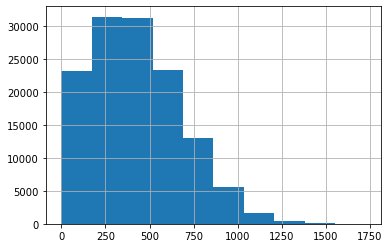

In [13]:
internet_new = internet.query('mb_used != 0')
internet_new['mb_used'].hist()
internet_new['mb_used'].describe()

По графику видно, что теперь большая часть данных лежит не от 0 до 100 Мб, а от 200 до 500 Мб. Также относительно исходных данных поменялись среднее значение и медиана. В дальнейшем для анализа данных нам необходимо будет искать общий объём трафика, а не среднее значение или их количество, поэтому несмотря на то, что данные в 0 Мб можно считать ошибкой, в данном случае избавляться от этих строк мы не будем.

### Тарифы

In [14]:
display(tariffs)
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Данные в порядке, но для дальнейшего исследования будет удобнее перевести включенные Мб в Гб для подсчета и переименовать столбец.

In [15]:
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included']/1024).astype('int')
tariffs = tariffs.rename(columns={'mb_per_month_included': 'gb_per_month_included', 'tariff_name':'tariff'})

### Пользователи

In [16]:
display(users.head(10))
users.info()
users.duplicated().sum()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

Нет дубликатов. Есть пропущенные значения в столбце `churn_date`. По условию это значит, что абонент еще пользовался тарифом на момент выгрузки данных. Поэтому эти пропущенные значения не трогаем. Необходимо перевести дату в формат `datetime` и изучить столбец `age`.

In [17]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info() # проверка получившихся значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64


<AxesSubplot:>

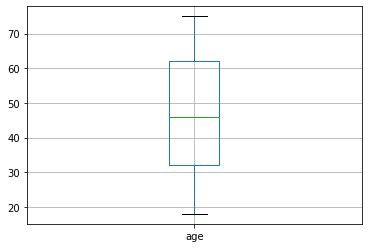

In [18]:
print(users['age'].describe())
users.boxplot('age')

Минимальный возраст - 18 лет, максимальный - 75, вполне жизненные значения. Также можно заметить, что медиана и среднее почти совпадают, значит данные однородны.

**Вывод**

В данном пунтке были обработаны следующие данные:
- Во всех таблицах формат даты переведен в `datetime`
- В таблице со звонками убраны строки, где продолжительность звонка равна 0 (пропущенные звонки)
- В таблице интернета убран лишний столбец `Unnamed: 0`
- В таблице с тарифами добавлен столбец с переводом Мб в Гб

## Добавление данных 

Для дальнейшего анализа данных составим одну таблицу из всех имеющихся, в которой будут содержатся столбцы `user_id`, `city`, `tariff` из ДатаФрейма `users`; все данные по тарифу из из ДатаФрейма `tariffs`; а также данные:
- 'calls_amount' - количество звонков
- 'calls_duration' - суммарная продолжительность звонков
- 'messages_amount' - количество сообщений
- 'mb_used'/ 'gb_used' - количество использованных Мб и Гб соответственно
- 'month' - месяц использования тарифа

Эти данные получим сначала преобразованием в изначальных таблицах, а затем соединим все нужные столбцы в один ДатаФрейм `data`.

In [19]:
data = users.drop(columns = ['age', 'churn_date', 'first_name', 'last_name','reg_date'], axis = 1)
data = data.merge(tariffs, on='tariff') # добавление данные по тарифу
data.head() 

,user_id,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1
1,1003,Москва,ultra,1000,30,3000,1950,150,1,1
2,1004,Новокузнецк,ultra,1000,30,3000,1950,150,1,1
3,1013,Иваново,ultra,1000,30,3000,1950,150,1,1
4,1016,Омск,ultra,1000,30,3000,1950,150,1,1


Обработаем ДатаФрейм `calls`.

In [20]:
 # добавление столбца с месяцем для создания сводной таблицы
calls['month']=calls['call_date'].dt.month
# создание сводной таблицы по пользователю и месяцу с подсчетом количества звонков и их продолжительности
calls_new = calls.pivot_table(index=['user_id', 'month'], values ='duration', aggfunc=['count', 'sum']).reset_index()
# переименование столбцов
calls_new.columns=['user_id', 'month', 'calls_amount', 'calls_duration']
# округление звонков сначала до целых минут в меньшую сторону с помощью 'int', затем прибавление 1 для подсчета минут по правилам тарифа
calls_new['calls_duration'] = (calls_new['calls_duration'].astype('int'))+1
calls_new.head()

,user_id,month,calls_amount,calls_duration
0,1000,5,17,151
1,1000,6,28,159
2,1000,7,41,319
3,1000,8,42,390
4,1000,9,46,441


Обработаем ДатаФрейм `messages` аналогично обработке ДатаФрейма `calls`.

In [21]:
messages['month']=messages['message_date'].dt.month
messages_new = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_new.columns=['user_id', 'month', 'messages_amount']
messages_new.head()

,user_id,month,messages_amount
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Обработаем ДатаФрейм `internet` аналогично обработке ДатаФрейма `calls`.

In [22]:
internet['month']=internet['session_date'].dt.month
internet_new = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
# перевод Гб в Мб и их округление сначала до целого значения в меньшую сторону с помощью 'int'
# затем прибавление 1 для подсчета Гб по правилам тарифа
internet_new['gb_used']=(internet_new['mb_used']/1024).astype('int')+1
internet_new.head()

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15


Cоединим сначала таблицы со звонками, сообщениями и интернетом в новый Датафрейм `data_new` по id и по месяцам, потом его присоединим к основной таблице `data`. Все объединения сделаем при помощи `merge()` внешним методом `outer`, чтобы не потерять данные. Для проверки будем выводить количество сообщений, минут и гб до и после объединения.

In [23]:
print('количество минут до объединения', calls_new['calls_duration'].sum())
print('количество сообщений до объединения', messages_new['messages_amount'].sum())
print('количество трафика до объединения', internet_new['gb_used'].sum())

количество минут до объединения 1370386
количество сообщений до объединения 123036
количество трафика до объединения 55601


In [24]:
data_new = calls_new.merge(messages_new, on=['user_id','month'], how='outer').merge(internet_new, on=['user_id','month'], how='outer')
display(data_new.head())
data_new.info()

,user_id,month,calls_amount,calls_duration,messages_amount,mb_used,gb_used
0,1000,5,17.0,151.0,22.0,2253.49,3.0
1,1000,6,28.0,159.0,60.0,23233.77,23.0
2,1000,7,41.0,319.0,75.0,14003.64,14.0
3,1000,8,42.0,390.0,81.0,14055.93,14.0
4,1000,9,46.0,441.0,57.0,14568.91,15.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3214 non-null   int64  
 1   month            3214 non-null   int64  
 2   calls_amount     3168 non-null   float64
 3   calls_duration   3168 non-null   float64
 4   messages_amount  2717 non-null   float64
 5   mb_used          3203 non-null   float64
 6   gb_used          3203 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


In [25]:
print('количество минут после объединения', data_new['calls_duration'].sum())
print('количество сообщений после объединения', data_new['messages_amount'].sum())
print('количество трафика после объединения', data_new['gb_used'].sum())

количество минут после объединения 1370386.0
количество сообщений после объединения 123036.0
количество трафика после объединения 55601.0


По пропущенным значениям в столбцах очевидно, что есть определенные виды связи, например, только звонки и интернет, поэтому в столбцах messages_amount, mb_used, gb_used, calls_amount, calls_duration заменим пропущенные значения на 0, то есть совсем не использовали.

In [26]:
data_new[['messages_amount', 'mb_used', 'gb_used','calls_amount','calls_duration']] = data_new[['messages_amount', 'mb_used', 'gb_used', 'calls_amount','calls_duration']].fillna(0)

Теперь присоеденим этот Датафрейм к основному.

In [27]:
data = data.merge(data_new, on='user_id', how='outer')

In [28]:
print('количество минут после объединения', data['calls_duration'].sum())
print('количество сообщений после объединения', data['messages_amount'].sum())
print('количество трафика после объединения', data['gb_used'].sum())

количество минут после объединения 1370386.0
количество сообщений после объединения 123036.0
количество трафика после объединения 55601.0


In [29]:
data.info() # проверка данных
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   city                   3216 non-null   object 
 2   tariff                 3216 non-null   object 
 3   messages_included      3216 non-null   int64  
 4   gb_per_month_included  3216 non-null   int32  
 5   minutes_included       3216 non-null   int64  
 6   rub_monthly_fee        3216 non-null   int64  
 7   rub_per_gb             3216 non-null   int64  
 8   rub_per_message        3216 non-null   int64  
 9   rub_per_minute         3216 non-null   int64  
 10  month                  3214 non-null   float64
 11  calls_amount           3214 non-null   float64
 12  calls_duration         3214 non-null   float64
 13  messages_amount        3214 non-null   float64
 14  mb_used                3214 non-null   float64
 15  gb_u

,user_id,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,calls_amount,calls_duration,messages_amount,mb_used,gb_used
0,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,5.0,17.0,151.0,22.0,2253.49,3.0
1,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,6.0,28.0,159.0,60.0,23233.77,23.0
2,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,7.0,41.0,319.0,75.0,14003.64,14.0
3,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,8.0,42.0,390.0,81.0,14055.93,14.0
4,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,9.0,46.0,441.0,57.0,14568.91,15.0


Проверим пропущенные значения. И приведем значения в последних 6 столбцах к целочисленному типу.

In [30]:
display(data[data['month'].isna()])

,user_id,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,calls_amount,calls_duration,messages_amount,mb_used,gb_used
243,1128,Волжский,ultra,1000,30,3000,1950,150,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2619,1371,Омск,smart,50,15,500,550,200,3,3,NaN,NaN,NaN,NaN,NaN,NaN


По данным пользователям нет никакой активности, вероятно они просто купили сим-карту и не стали её использовать. Такие данные можно не брать врасчёт, поэтому удалим эти строки.

In [31]:
data = data.dropna(subset=['month'])

In [32]:
# приведение столбцов к целочисленному типу
data[['month','calls_amount', 'calls_duration', 'messages_amount', 'mb_used', 'gb_used']] = data[['month','calls_amount', 'calls_duration', 'messages_amount', 'mb_used', 'gb_used']].astype('int')

In [33]:
data.info() # окончательная проверка данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3215
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                3214 non-null   int64 
 1   city                   3214 non-null   object
 2   tariff                 3214 non-null   object
 3   messages_included      3214 non-null   int64 
 4   gb_per_month_included  3214 non-null   int32 
 5   minutes_included       3214 non-null   int64 
 6   rub_monthly_fee        3214 non-null   int64 
 7   rub_per_gb             3214 non-null   int64 
 8   rub_per_message        3214 non-null   int64 
 9   rub_per_minute         3214 non-null   int64 
 10  month                  3214 non-null   int32 
 11  calls_amount           3214 non-null   int32 
 12  calls_duration         3214 non-null   int32 
 13  messages_amount        3214 non-null   int32 
 14  mb_used                3214 non-null   int32 
 15  gb_used              

Посчитаем помесячную выручку с каждого пользователя. Для этого создадим три функции отдельно для дополнительной платы за звонки, сообщения и интернет. Получив эти данные, прибавим дополнительную стомость к ежемесячной стоимости тарифного плана.

In [34]:
# функция, которая возвращает дополнительную стоимость за звонки по правилу:
    # если длительность звонков меньше включенных минут - cost_calls=0
    # в ином случае вычитаем из текущей длительности включенные минуты и умножаем на стоимость одной доп минуты

def cost_calls(row): 
    if row['calls_duration'] <= row['minutes_included']:
        return 0
    else:
        return (row['calls_duration']-row['minutes_included'])*row['rub_per_minute']
data['cost_calls'] = data.apply(cost_calls, axis=1)

In [35]:
# функция, которая возвращает дополнительную стоимость за собщения по правилу:
    # если количество сообщений меньше включенных в тариф - cost_messages = 0
    # в ином случае вычитаем из текущего количества включенные сообщения и умножаем на стоимость одного доп сообщения
    
def cost_messages(row): 
    if row['messages_amount'] <= row['messages_included']:
        return 0
    else:
        return (row['messages_amount']-row['messages_included'])*row['rub_per_message']
data['cost_messages'] = data.apply(cost_messages, axis=1)

In [36]:
# функция, которая возвращает дополнительную стоимость за интернет по правилу:
    # если количество Гб меньше включенных в тариф - cost_internet = 0
    # в ином случае вычитаем из текущего количества включенные Гб и умножаем на стоимость одного доп Гб
    
def cost_internet(row): 
    if row['gb_used'] <= row['gb_per_month_included']:
        return 0
    else:
        return (row['gb_used']-row['gb_per_month_included'])*row['rub_per_gb']
    
data['cost_internet'] = data.apply(cost_internet, axis=1)

In [37]:
# считаем общую стоимость

data['total_cost'] = data['rub_monthly_fee']+data['cost_calls']+data['cost_messages']+data['cost_internet']

In [38]:
# для удобства удалим ненужные для дальнейшего анализа столбцы

data = data.drop(columns = ['messages_included', 'gb_per_month_included', 'minutes_included', 'rub_monthly_fee','rub_per_gb','rub_per_message','rub_per_minute','cost_calls', 'cost_messages', 'cost_internet', 'calls_amount', 'mb_used'], axis = 1)

In [39]:
data.tail()

,user_id,city,tariff,month,calls_duration,messages_amount,gb_used,total_cost
3211,1498,Владикавказ,smart,10,233,42,21,1750
3212,1499,Пермь,smart,9,65,11,2,550
3213,1499,Пермь,smart,10,430,48,18,1150
3214,1499,Пермь,smart,11,577,59,18,1408
3215,1499,Пермь,smart,12,466,66,13,598


## Анализ тарифов

### Звонки

Среднее количество минут в месяц тарифа ultra равно:  498
Дисперсия:  89958.09
Стандартное отклонение:  299.93

Среднее количество минут в месяц тарифа smart равно:  395
Дисперсия:  32391.71
Стандартное отклонение:  179.98



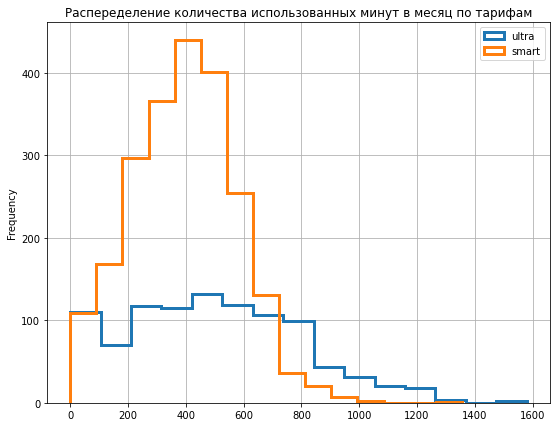

In [40]:
for n in data['tariff'].unique():    
    print('Среднее количество минут в месяц тарифа', n,'равно: ', round(data.query('tariff == @n')['calls_duration'].mean()))
    print('Дисперсия: ', round(np.var(data.query('tariff == @n')['calls_duration'], ddof=1), 2))
    print('Стандартное отклонение: ', round(np.std(data.query('tariff == @n')['calls_duration'], ddof=1), 2))
    print('')
    data.query('tariff == @n')['calls_duration'].plot(kind='hist',
                                                      bins=15,
                                                      histtype='step', 
                                                      linewidth=3, 
                                                      label=n, 
                                                      grid=True, 
                                                      legend=True, 
                                                      title='Распеределение количества использованных минут в месяц по тарифам',
                                                      figsize=(9,7))

- Исходя из выборки в среднем пользователям тарифа smart в месяц необходимо 395 минут, чаще всего тратят от 300 до 500 минут в месяц. 
- По тарифу ultra среднее количество минут составляет 498, а чаще всего пользователи тратят от 300 до 700 минут, то есть поведение пользователей двух тарифов по звонкам достаточно похожее.
- В тарифе smart большая часть пользователей тарифа укладывается во включенный пакет минут, но есть выпадающие значения, которые больше 900 минут. Из-за них распределение имеет небольшую положительную скошенность, что видно на гистограмме.
- В тарифе ultra все пользователи укладываются в пакет включенных минут. Гистограмма тарифа ultra также имеет положительную скошенность, причем более выраженную. 
- Но оба распределения приближены к нормальному, чтобы в этом убедиться воспользуемся методом `describe()`.

In [41]:
print(data.query('tariff == "smart"')['calls_duration'].describe())
print('')
data.query('tariff == "ultra"')['calls_duration'].describe()

count    2229.000000
mean      394.928668
std       179.976975
min         0.000000
25%       268.000000
50%       398.000000
75%       516.000000
max      1355.000000
Name: calls_duration, dtype: float64



count     985.000000
mean      497.553299
std       299.930150
min         0.000000
25%       268.000000
50%       489.000000
75%       712.000000
max      1579.000000
Name: calls_duration, dtype: float64

Можно заметить, что и в том, и другом тарифе значения среднего и медианы достаточно близки, это также подтверждает, что распределения стремятся к нормальному.

В этом случае для тарифа smart можно расчитать, с какой вероятностью пользователь потратит 500 минут и меньше за один месяц, то есть уложится во включенный пакет минут.

In [42]:
# задаём нормальное распределение с математическим ожиданием 396 и стандартным отклонением 178
print(round((st.norm(396, 178).cdf(500)*100)), '%') # считаем вероятность получить значение 500

72 %


В 72% случаев пользователи не будут переплачивать за минуты, так как смогут уложиться в количество минут, включенных в пакет. Остальным 28% придется платить сверх тарифа за потраченные минуты.

### Сообщения

Среднее количество сообщений в месяц тарифа ultra равно:  49
Дисперсия:  2285.27
Стандартное отклонение:  47.8

Среднее количество сообщений в месяц тарифа smart равно:  33
Дисперсия:  796.81
Стандартное отклонение:  28.23



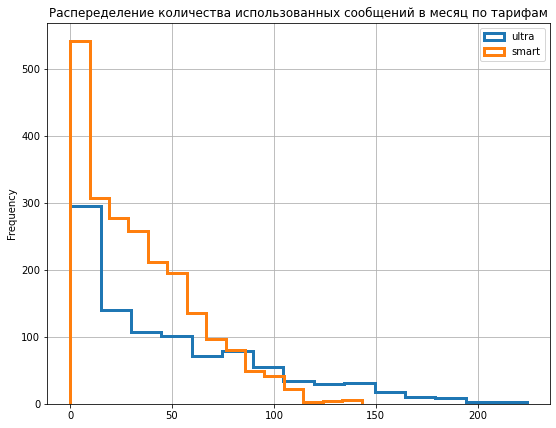

In [43]:
for n in data['tariff'].unique():    
    print('Среднее количество сообщений в месяц тарифа', n,'равно: ', round(data.query('tariff == @n')['messages_amount'].mean()))
    print('Дисперсия: ', round(np.var(data.query('tariff == @n')['messages_amount'], ddof=1), 2))
    print('Стандартное отклонение: ', round(np.std(data.query('tariff == @n')['messages_amount'], ddof=1), 2))
    print('')
    data.query('tariff == @n')['messages_amount'].plot(kind='hist',
                                                      bins=15,
                                                      histtype='step', 
                                                      linewidth=3, 
                                                      label=n, 
                                                      grid=True, 
                                                      legend=True, 
                                                      title='Распеределение количества использованных сообщений в месяц по тарифам',
                                                      figsize=(9,7))

- Даже несмотря на то, что средние значения количества сообщений в месяц значительно отличаются, чаще всего пользователи обоих тарифов отправляют в месяц до 30 сообщений. 
- Как и в звонках все пользователи тарифа ultra укладываются во включенный пакет сообщений. В тарифе smart большинство пользователей укладываются в 50 сообщений, но есть те, кто явно превышают этот лимит.
- Обе гистограммы напоминают распределение Пуассона. Вероятно, это обусловлено тем, что с приходом разных мессенджеров, пользователи отправляют всё меньше сообщений, то есть число событий - отправленных сообщений в месяц - невелико, поэтому гистограммы смещены влево, что является верным признаком распределения Пуассона.

### Интернет

Среднее количество Гб в месяц тарифа ultra равно:  19
Дисперсия:  97.05
Стандартное отклонение:  9.85

Среднее количество Гб в месяц тарифа smart равно:  16
Дисперсия:  33.01
Стандартное отклонение:  5.75



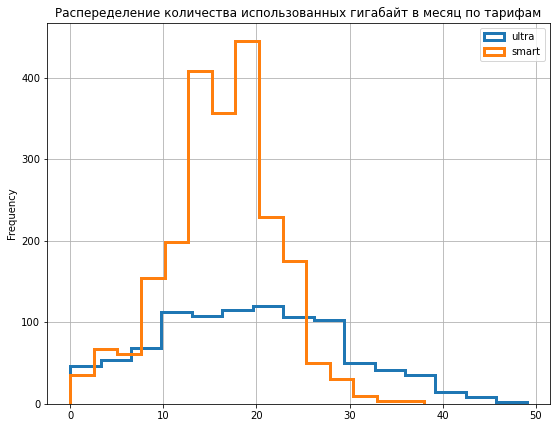

In [44]:
for n in data['tariff'].unique():
    print('Среднее количество Гб в месяц тарифа', n, 'равно: ', round(data.query('tariff == @n')['gb_used'].mean()))
    print('Дисперсия: ', round(np.var(data.query('tariff == @n')['gb_used'], ddof=1), 2))
    print('Стандартное отклонение: ', round(np.std(data.query('tariff == @n')['gb_used'], ddof=1), 2))
    print('')
    data.query('tariff == @n')['gb_used'].plot(kind='hist',
                                                      bins=15,
                                                      histtype='step', 
                                                      linewidth=3, 
                                                      label=n, 
                                                      grid=True, 
                                                      legend=True, 
                                                      title='Распеределение количества использованных гигабайт в месяц по тарифам',
                                                      figsize=(9,7))

- Среднее количество потраченных Гб у пользователей разных тарифов почти одинаковое, но в тарифе ultra разброс использования явно выше, так как стандартное отклонение значительно отличается от стандартного отклонения тарифа smart. 
- Пользователи тарифа smart чаще всего тратят от 11 до 20 Гб за месяц, а тарифа ultra - от 10 до 30 Гб. 
- Также как в звонках и сообщениях, в тарифе ultra все укладываются во включенный пакет интернета. В тарифе smart явно половина или даже большинство не укладываются во включеннные Гб в пакет. Так как оплата дополнительных Гб самая затратная статья в условиях тарифа, то использование Гб сверх пакета может привести к большой переплате.
- Обе гистрограммы имеют ярко выраженное нормальное распределение, чтобы в этом убедиться воспользуемся методом `describe()`.

In [45]:
print(data.query('tariff == "smart"')['gb_used'].describe())
print('')
data.query('tariff == "ultra"')['gb_used'].describe()

count    2229.000000
mean       16.329296
std         5.745824
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64



count    985.000000
mean      19.495431
std        9.851552
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

И в том, и другом тарифе значения среднего и медианы очень близки, это также подтверждает, что распределения стремятся к нормальному.
В этом случае для тарифа smart можно расчитать, с какой вероятностью пользователь потратит 15 Гб и меньше за один месяц, то есть уложится во включенный пакет интернета.

In [46]:
print(round(st.norm(16.3, 5.75).cdf(15)*100), '%')

41 %


Почти в 60% случаев пользователям придется переплачивать за интернет. Учитывая, что переплата составляет 200 руб/Гб, пользователям, у кого идёт превышение лимита интернета более, чем на 7 гб (в месяц - от 22 Гб и более) будет выгоднее сменить тариф на Ultra.

### Выручка

Средняя выручка с тарифа в месяц ultra равна:  2070
Дисперсия:  141516.75
Стандартное отклонение:  376.19

Средняя выручка с тарифа в месяц smart равна:  1258
Дисперсия:  641464.13
Стандартное отклонение:  800.91



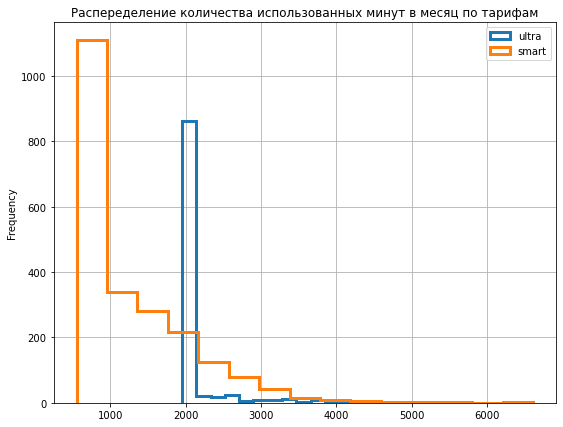

In [47]:
for n in data['tariff'].unique():    
    print('Средняя выручка с тарифа в месяц', n,'равна: ', round(data.query('tariff == @n')['total_cost'].mean()))
    print('Дисперсия: ', round(np.var(data.query('tariff == @n')['total_cost'], ddof=1), 2))
    print('Стандартное отклонение: ', round(np.std(data.query('tariff == @n')['total_cost'], ddof=1), 2))
    print('')
    data.query('tariff == @n')['total_cost'].plot(kind='hist',
                                                      bins=15,
                                                      histtype='step', 
                                                      linewidth=3, 
                                                      label=n, 
                                                      grid=True, 
                                                      legend=True, 
                                                      title='Распеределение количества использованных минут в месяц по тарифам',
                                                      figsize=(9,7))

- В тарифе smart средняя выручка равна 1258р, это значение сильно отличается от стоимости абонентской платы в 550р., также, учитывая стандартное отклонение, наблюдается очень большой разброс в ежемесячном платеже. Многие пользователи этого тарифа явно переплачивают за использование трафика сверх пакета.
- В тарифе ultra средняя выручка составляет 2070р, чуть выше месячной абонентской платы в 1950р. Некоторые пользователи также переплачивают за трафик сверх пакета, но их доля явно меньше, чем в тарифе smart.

## Проверка гипотез

Проверим две гипотезы и для каждой сформулируем альтернативную. Так как нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства, то нулевые и альтернативные гипотезы будут следующие:

*Гипотеза 1:*
- H₀: средние выручки пользователей тарифов «Ультра» и «Смарт» равны
- H₁: средние выручки пользователей тарифов «Ультра» и «Смарт» не равны
  
*Гипотеза 2:*  
- H₀: средние выручки пользователей из Москвы и пользователей из других регионов равны
- H₁: средние выручки пользователей из Москвы и пользователей из других регионов не равны

### Гипотеза 1

Проверим объем выборки для каждого из тарифов.

In [48]:
data.groupby('tariff')['user_id'].count()

tariff
smart    2229
ultra     985
Name: user_id, dtype: int64

Так как количество пользователей тарифа smart превышает пользователей тарифа ultra более, чем в 2 раза, то объемы выборок разные. Тогда добавим параметр `equal_var = False`. Критический уровень статистической значимости возьмём 0.01. Проверим первую гипотезу.

In [49]:
sample_1 = data.query('tariff == "smart"')['total_cost']
sample_2 = data.query('tariff == "ultra"')['total_cost']
alpha = .01
results_0 = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение: ', results_0.pvalue)

if results_0.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение:  6.184876677508212e-274
Отвергаем нулевую гипотезу


Вероятность того, что средние двух выборок окажутся равными ничтожна мала, значит мы отвергаем нулевую гипотезу в пользу альтернативной - **средние выручки пользователей тарифов «Ультра» и «Смарт» не равны.**

### Гипотеза 2

Проверим объем выборки для Москвы и других городов.

In [50]:
print('Объем выборки для Москвы равен', data.query('city == "Москва"')['total_cost'].count())
print('Объем выборки для других городов равен', data.query('city != "Москва"')['total_cost'].count())

Объем выборки для Москвы равен 611
Объем выборки для других городов равен 2603


Объемы выборок разные. Тогда добавим параметр `equal_var = False`. Критический уровень статистической значимости возьмём 0.01. Проверим вторую гипотезу.

In [51]:
sample_3 = data.query('city == "Москва"')['total_cost']
sample_4 = data.query('city != "Москва"')['total_cost']
betta = .01
results_1 = st.ttest_ind(
    sample_3, 
    sample_4,
    equal_var = False)

print('p-значение: ', results_1.pvalue)

if results_1.pvalue < betta:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение:  0.4653490294517445
Не отвергаем нулевую гипотезу


Вероятность равенства выручек 37,6% - это значение явно выше порогов, поэтому отвергнуть первую гипотезу не можем. Получается, что **средние выручки пользователей из Москвы и пользователей из других регионов равны.**

## Общий вывод

- Поведение пользователей разных тарифов незначительно отличается друг от друга. В тарифе ultra минуты, сообщения и Гб в месяц в среднем тратятся больше, но не намного. 
- Пользователям тарифа ultra не приходится переплачивать за минуты, сообщения и Гб сверх пакета, так как все пользователи из выборки укладываются во включенный пакет. Пользователи тарифа smart не всегда укладываются в тариф и время от времени им приходится платить за дополнительные услуги связи.
- Распределения затраченных минут и Гб в месяц приближаются к нормальному распределению, а потраченные сообщения в месяц напоминают распределение Пуассона. 
- Гипотеза о том, что средние выручки пользователей тарифов «Ультра» и «Смарт» равны была отвергнута.
- Гипотеза о том, что средние выручки пользователей из Москвы и пользователей из других регионов равны не была отвергнута.
- На данный момент тарифом smart пользуется большинство клиентов, но многие переплачивают сверх абонентской платы из-за дополнительного трафика. 
- Помесячная выручка с тарифа ultra, больше чем с тарифа smart более чем в 1,5 раза. По моему мнению стоит вкладывать средства в продвижении тарифа ultra. Для пользователей преимуществом будет то, что не нужно волноваться за переплату сверх пакета и счетать истраченные минуты и Гб, так как почти все пользователи укладываются в абонентскую плату. А для компании этот тариф приносит больше средней выручки. И уже на данном этапе, можно перевести тех пользователей с тарифа smart, кто много тратит на интернет.